# Sub-Problem 2: Are there particular locations in Seattle where AirBnb listings fetch higher prices?

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
sb.set()

In [2]:
#Importing the listing dataset
listingsDF = pd.read_csv('/content/drive/MyDrive/Airbnb/data/listings.csv')
listingsDF.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


Data Cleaning

In [3]:
#Since this sub-problem focuses on the location of the listings, we will only extract
#varaiables that are related to its location.
listingDF = listingsDF[['id','name','longitude','latitude','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','number_of_reviews','price']]
listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,NaN,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,$70.00
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,$116.00
2,5651579,Large studio apt by Capital Center & ESP@,-73.75966,42.64615,"Spacious studio with hardwood floors, fully eq...",f,The neighborhood is very eclectic. We have a v...,SECOND WARD,29288920,Gregg,...,Entire rental unit,Entire home/apt,2,1.0,0.0,1.0,3.22,"[""Backyard"", ""Iron"", ""Shampoo"", ""Cooking basic...",366,$75.00
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,$116.00
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,$305.00


In [4]:
import pandas as pd

#Replace NaN values with 0
listingDF = listingDF.fillna(0)

#Extract the 'price' column
priceDF = listingDF['price']

#Create an empty list for converted prices
prices = []

#Convert prices to float safely
for p in priceDF:
    if isinstance(p, str):                 #if price is a string like "$1,200"
        p = p.strip()
        if p.startswith('$'):
            p = p[1:]                      #remove dollar sign
        p = p.replace(',', '')             #remove commas
        p = float(p)
    else:
        p = float(p)                       #already numeric (e.g., 0 or float)
    prices.append(p)

#Update the price column in listingDF
listingDF['price'] = prices


In [5]:
#Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_month
listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.price > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

,id,name,longitude,latitude,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,host_id,host_name,...,property_type,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,number_of_reviews,price
0,2992450,Luxury 2 bedroom apartment,-73.75370,42.65789,The apartment is located in a quiet neighborho...,f,0,THIRD WARD,4621559,Kenneth,...,Entire rental unit,Entire home/apt,4,1.0,2.0,2.0,0.07,"[""TV with standard cable"", ""Air conditioning"",...",9,70.0
1,3820211,Restored Precinct in Center Sq. w/Parking,-73.76724,42.65222,"Cozy, cool little 1BR Apt in the heart Albany'...",f,"Great restaurants, architecture, walking, peop...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.49,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Free dr...",305,116.0
3,6623339,Center Sq. Loft in Converted Precinct w/ Parking,-73.76724,42.65222,Large renovated 1 bedroom apartment in convert...,f,"Located in Albany's finest urban neighborhood,...",SIXTH WARD,19648678,Terra,...,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,2.91,"[""Iron"", ""Shampoo"", ""Cooking basics"", ""Kitchen...",328,116.0
4,8035768,Entire Beautiful French Victorian 1884,-73.78147,42.66088,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Entire home,Entire home/apt,6,3.5,3.0,3.0,0.51,"[""Pocket wifi"", ""Smart lock"", ""Iron"", ""Shampoo...",56,305.0
5,8035784,Delightful French Victorian,-73.78115,42.66063,Stunningly renovated French Victorian original...,f,There is a Barbershop with 1900' barber chairs...,TENTH WARD,42430824,John M,...,Private room in home,Private room,2,2.5,1.0,1.0,0.17,"[""Smart lock"", ""Backyard"", ""Iron"", ""Shampoo"", ...",18,199.0


# Analyzing neighbourhood with price of listing

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

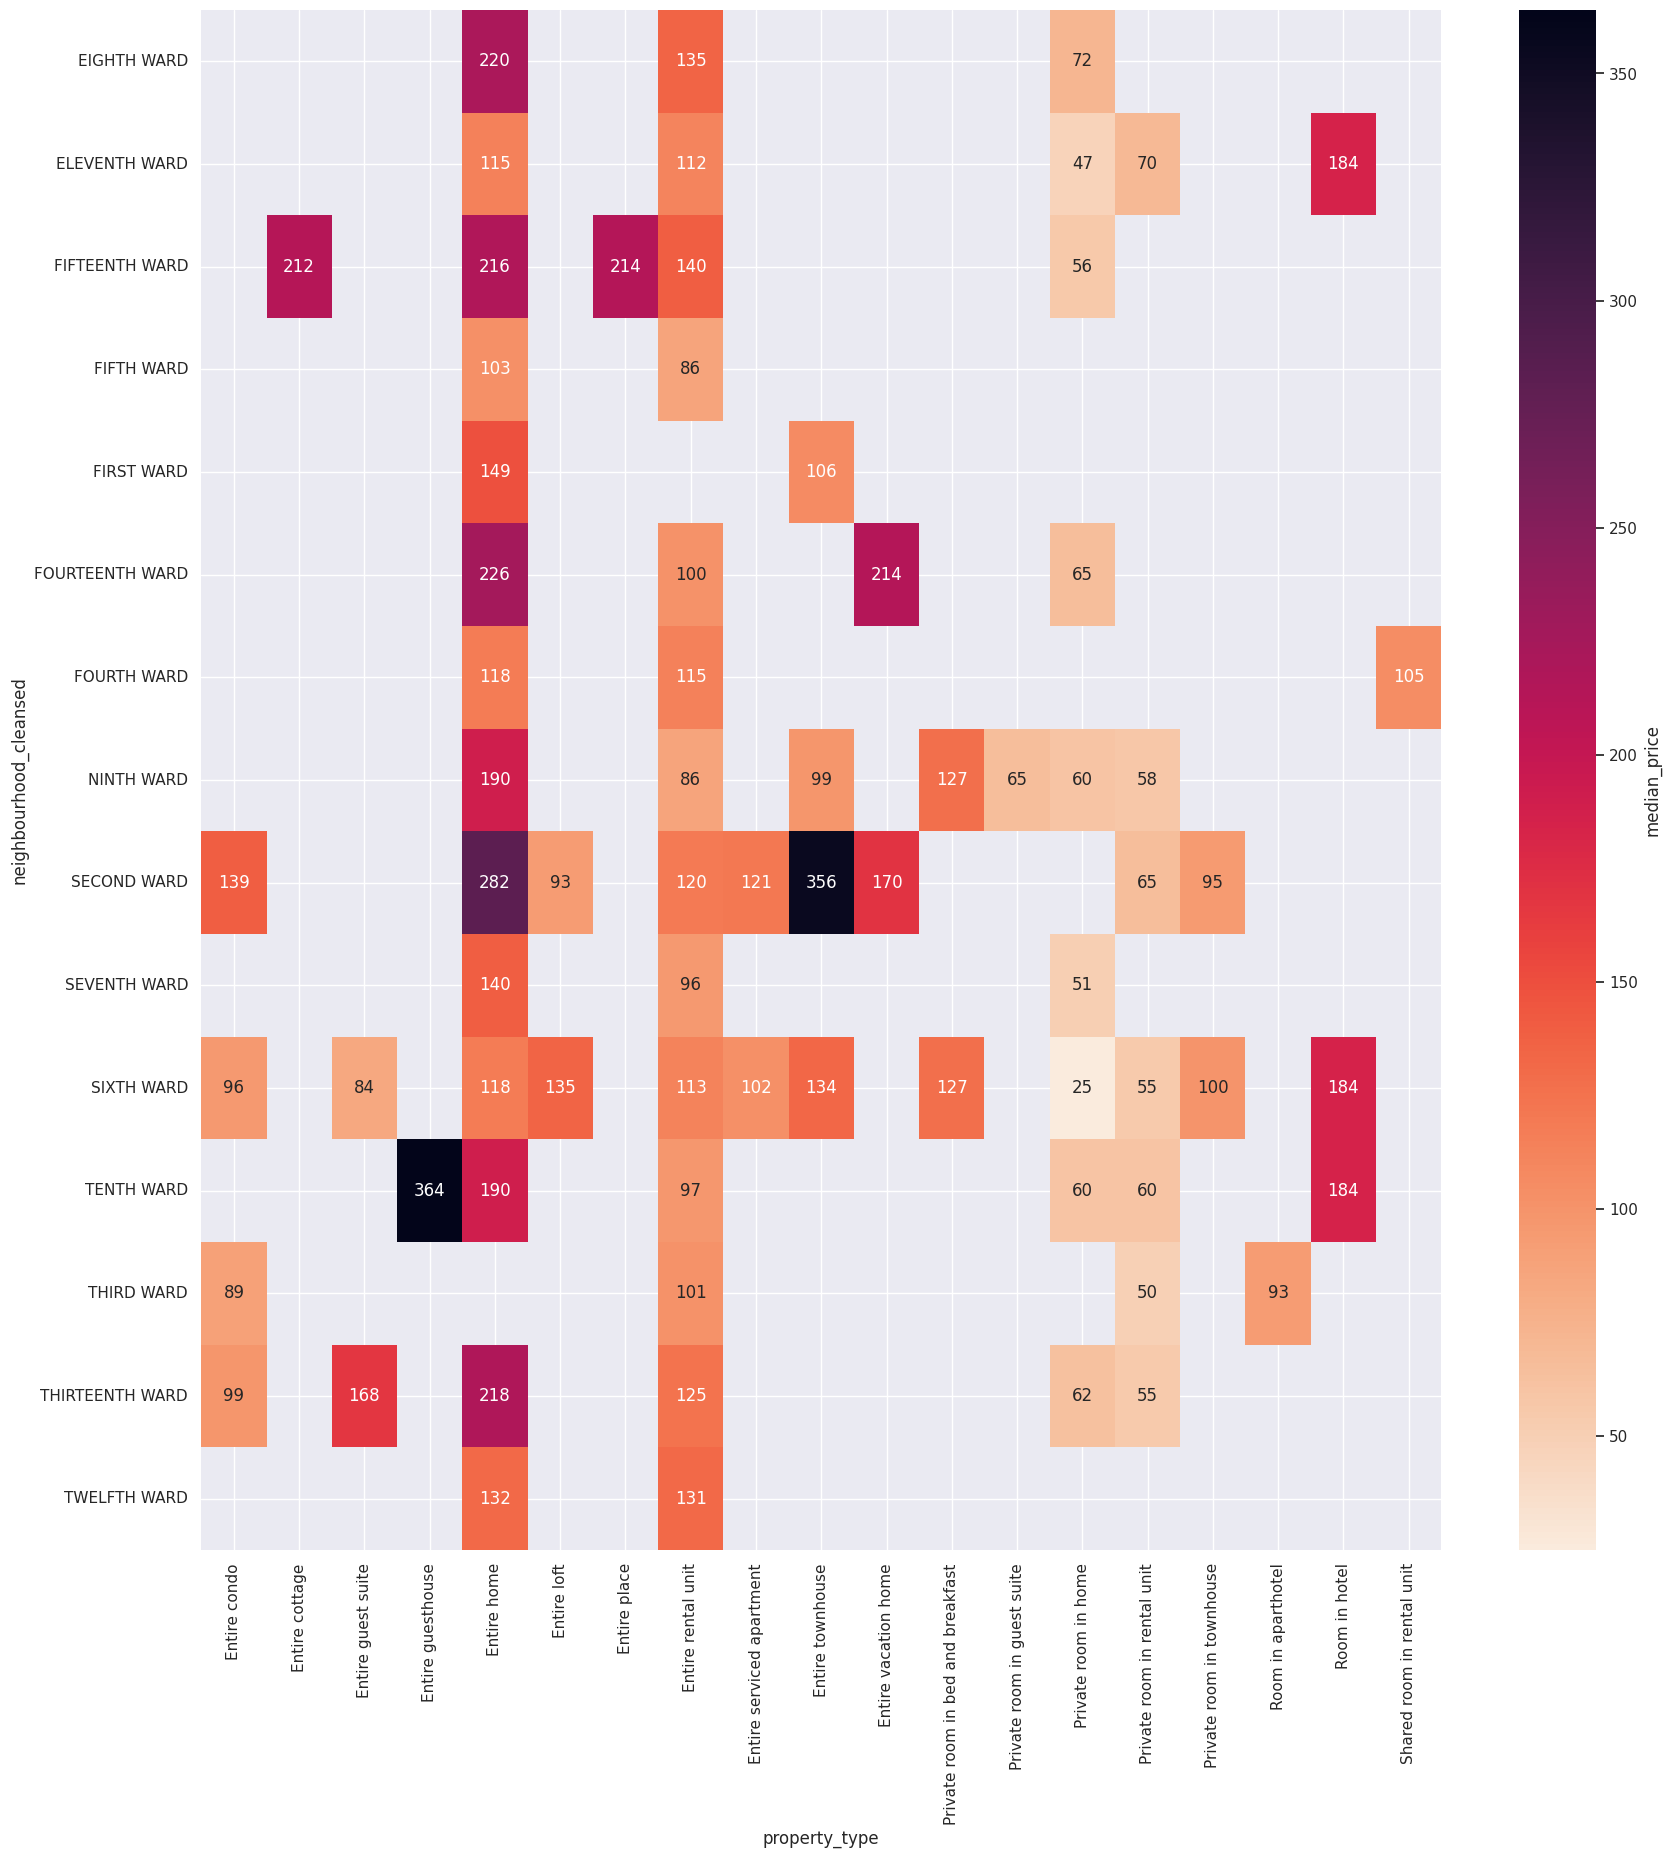

In [10]:
#Plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(20,20))
sb.heatmap(listingDF.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'median_price'})

The heatmap reveals that certain Albany neighborhoods—especially the Second Ward and Tenth Ward—show significantly higher median prices, with some listings exceeding $350. In contrast, wards like the Fifth, Sixth, and Thirteenth have lower-priced listings, indicating that Airbnb prices vary notably by neighborhood, with a clear concentration of high-value listings in a few premium areas.

# Finding the number of listings for each neighbourhood and median price

In [11]:
#Grouping neighbourhood by number of listings and then cleaning them

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
10,SIXTH WARD,62
8,SECOND WARD,33
12,THIRD WARD,23
13,THIRTEENTH WARD,20
11,TENTH WARD,18


The Sixth Ward has the highest number of listings (62), followed by the Second Ward (33) and Third Ward (23). This shows that Airbnb activity is most concentrated in the Sixth Ward, suggesting it is a popular area among hosts and travelers in New York.

In [12]:
#Grouping neighbourhood by average price of listings and cleaning them

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.median()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Median_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Median_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Median_Price
2,FIFTEENTH WARD,213.0
0,EIGHTH WARD,195.0
11,TENTH WARD,182.0
4,FIRST WARD,144.0
14,TWELFTH WARD,131.0


The Fifteenth Ward records the highest median price at $213, followed by the Eighth Ward ($195) and Tenth Ward ($182). This indicates that listings in these neighborhoods command premium prices, likely due to better location, amenities, or property types.

In [13]:
#Merging the two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Median_Price
0,SIXTH WARD,62,107.0
1,SECOND WARD,33,121.0
2,THIRD WARD,23,99.0
3,THIRTEENTH WARD,20,126.5
4,TENTH WARD,18,182.0


Text(0, 0.5, 'Number_Of_Listings')

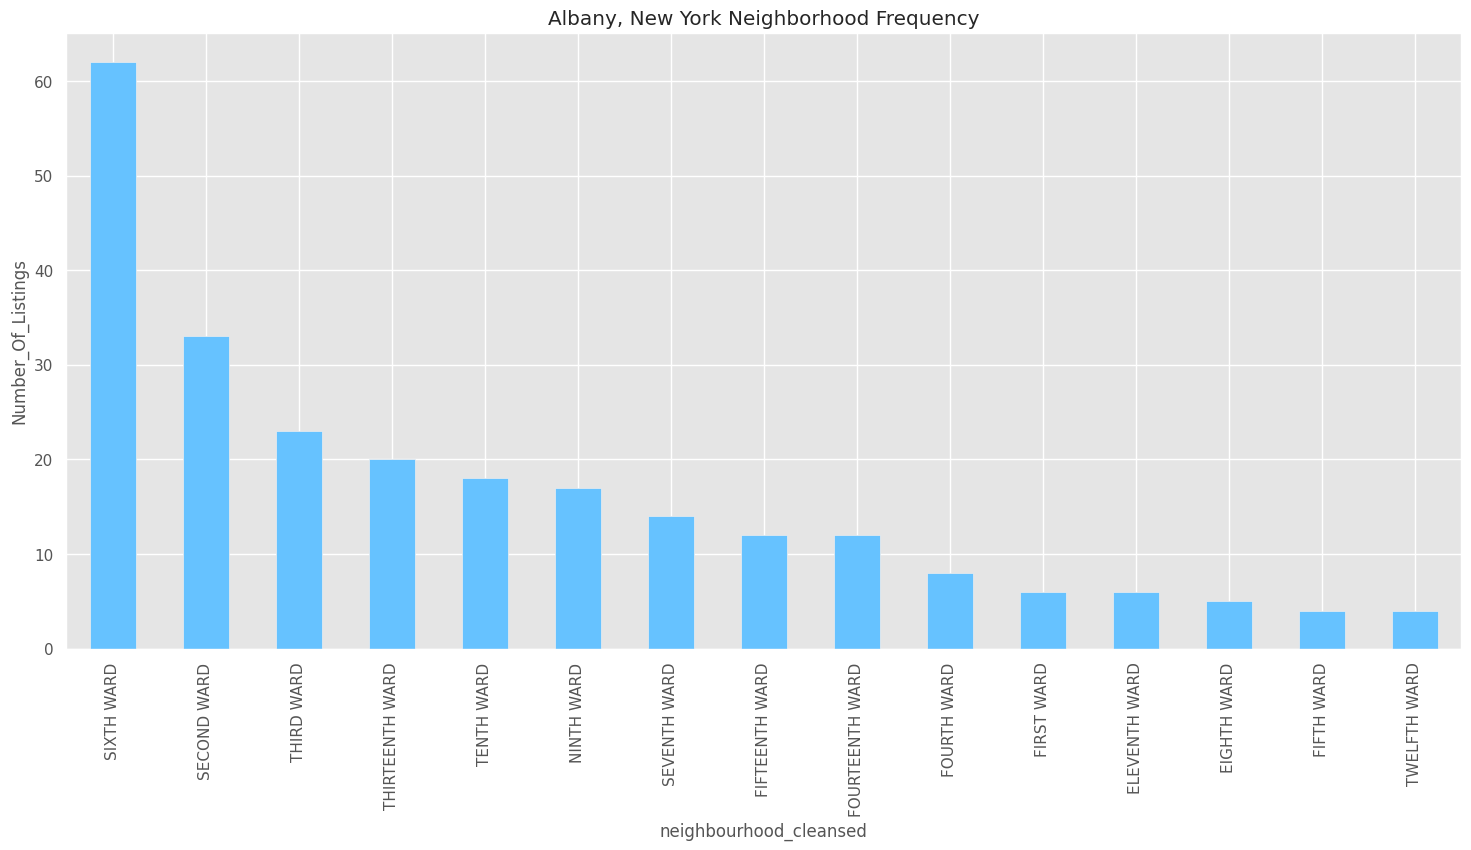

In [17]:
#Visualizing the number of listings for each neighbourhood
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar',
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff',
           figsize =(18,8),
           title = 'New York Neighborhood Frequency',
           legend = False)

plt.ylabel('Number_Of_Listings')

The bar chart shows that the Sixth Ward has by far the highest number of Airbnb listings, followed by the Second and Third Wards. This suggests that these neighborhoods are major Airbnb hubs in New York, attracting the majority of hosts and guests.

/tmp/ipython-input-83186576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")


<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

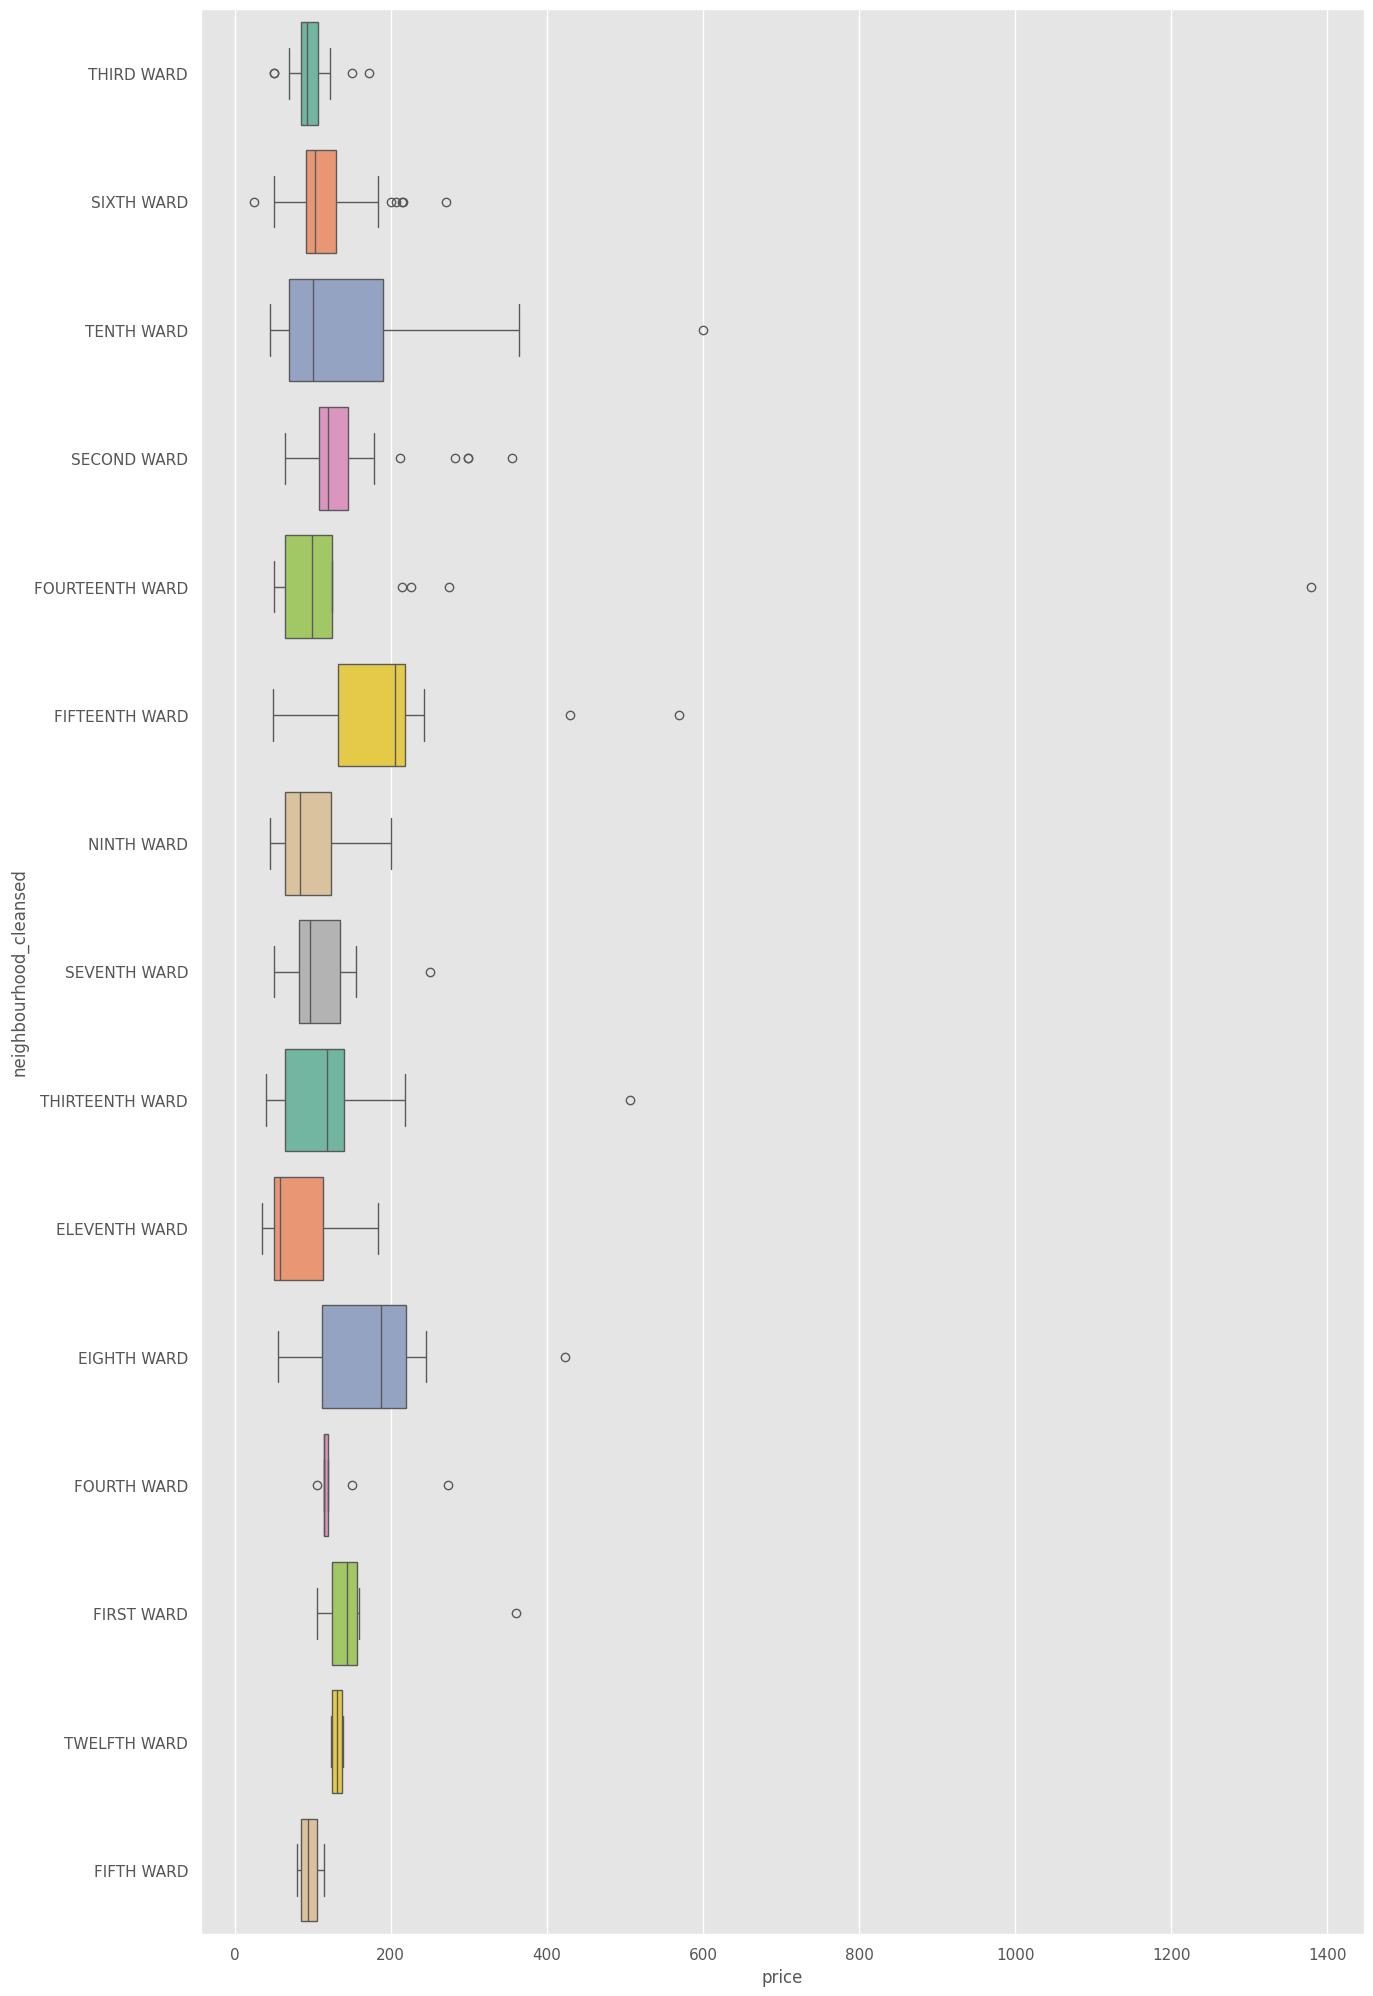

In [15]:
plt.figure(figsize = (15,25))
sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")

The boxplots show that the Tenth, Eighth, and Fifteenth Wards have the highest price variability and several high-end outliers, indicating premium listings in those areas. In contrast, wards like the Twelfth and First exhibit lower and more consistent prices, suggesting more affordable Airbnb options.

Text(0, 0.5, 'Median Price')

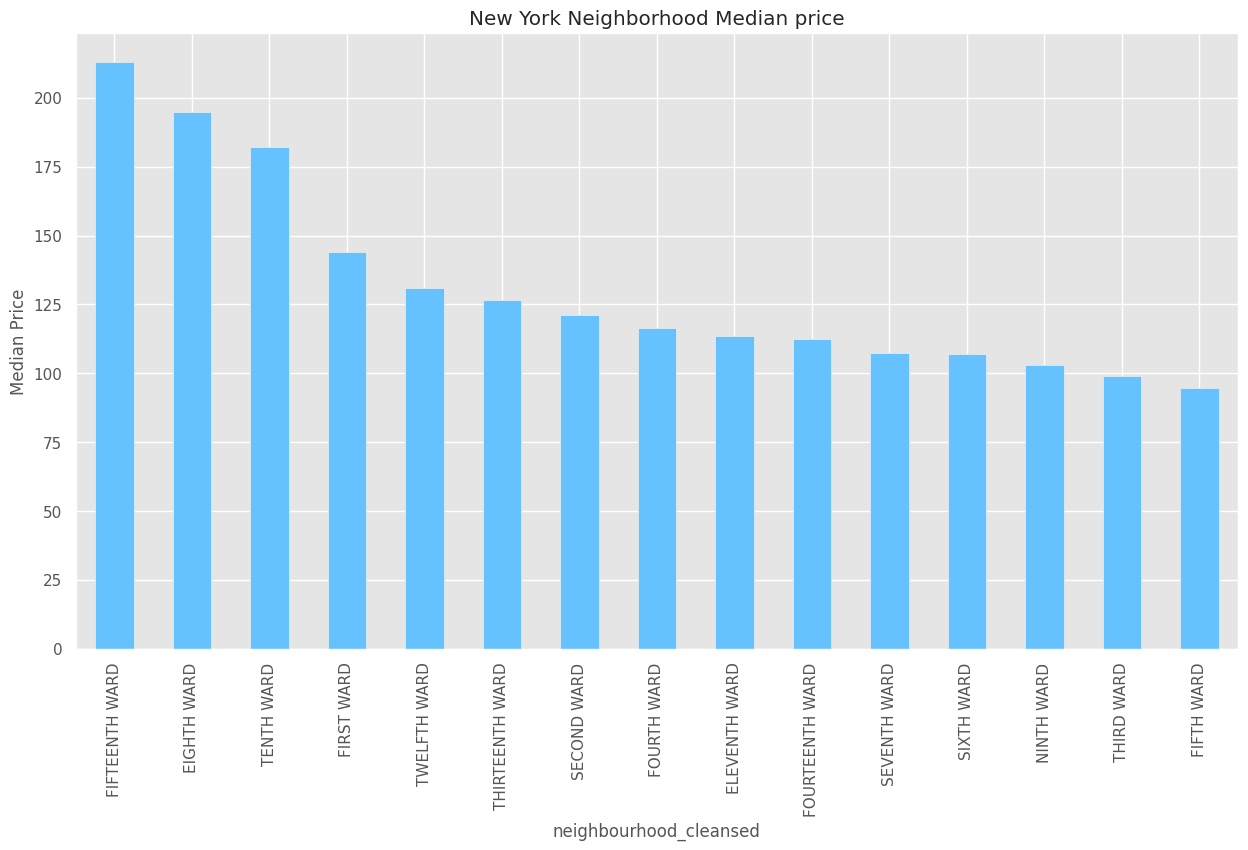

In [18]:
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Median_Price']

neighbourhoodPrice_DF.plot(kind='bar',
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff',
           figsize =(15,8),
           title = 'New York Neighborhood Median price',
           legend = False)

plt.ylabel('Median Price')

The bar chart highlights that the Fifteenth, Eighth, and Tenth Wards have the highest median prices, making them the most expensive neighborhoods for Airbnb stays. In contrast, wards like the Fifth, Third, and Ninth offer the lowest prices, showing a clear price disparity across New York's neighborhoods.

Summary: Location-Based Price Analysis

1. Airbnb prices vary significantly by neighborhood across Seattle.
2. Fifteenth, Eighth, and Tenth Wards record the highest median prices, indicating premium areas.
3. Sixth Ward has the most listings, showing it’s the most active Airbnb zone.
4. Second and Third Wards also have a high number of listings but moderate prices.
5. Boxplots reveal high price variability and outliers in Tenth and Eighth Wards, reflecting the presence of luxury properties.
6. Overall, central and high-demand neighborhoods fetch higher prices, while peripheral wards offer more budget-friendly stays.